# Sentimental Analysis on COVID-19 Tweets 
------------------

### Importing the Modules

In [104]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import re
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')


from collections import Counter

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
#pip install plotly

sns.set(style="darkgrid")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\loicb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\loicb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [105]:
import plotly.express as px

### Importing the Dataset

In [106]:
df = pd.read_csv  ("data/covid19_tweets.csv")
df.head()

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,Link(s),Media,Location,Retweets,Favorites,...,Followers,Follows,Listed,Verfied,User Since,Location.1,Bio,Website,Timezone,Profile Image
0,08/12/2020 07:19,@bhagirath0829,Bhagirath Bishnoi,Dear @nsitharaman @FinMinIndia @ianuragthakur ...,1.336194e+18,NaN,NaN,NaN,0.0,0.0,...,11.0,68.0,0.0,NaN,23/04/2016,"Rajasthan, Delhi, Gujarat",#msme E Commerce Business Owner,NaN,NaN,View
1,08/12/2020 07:19,@BaharBharat,Bahar Bharat,".@SingaporeAir , @airvistara sign commercial c...",1.336194e+18,https://www.livemint.com/companies/news/singap...,NaN,NaN,0.0,0.0,...,132.0,313.0,0.0,NaN,28/08/2017,NaN,Anything and Everything about #India and #Indi...,NaN,NaN,View
2,08/12/2020 07:19,@HarryDECarter,Harrison Carter,I have never seen commitment like it from the ...,1.336194e+18,https://twitter.com/nadhimzahawi/status/133617...,NaN,NaN,0.0,0.0,...,5668.0,749.0,27.0,NaN,30/07/2009,London,National Medical Director’s Clinical Fellow @N...,NaN,NaN,View
3,08/12/2020 07:19,@ConquerCovid_19,Conquer Coronavirus,A new study in @JPediatr found that #COVID19 c...,1.336194e+18,https://www.jpeds.com/article/S0022-3476(20)31...,https://pbs.twimg.com/media/EoscskyVoAUY5EK.jpg,NaN,0.0,0.0,...,1144.0,210.0,3.0,NaN,17/07/2020,"Norman, OK, US","Student, Teacher, Musician, Artist, Writer, Sc...",https://mp.weixin.qq.com/s/53lCh4rZDRqcx_JeepBwAA,NaN,View
4,08/12/2020 07:18,@adelpierro,Adel BolbolFernández,"Good article by The Economist, explaining that...",1.336194e+18,https://lnkd.in/dJB8RB8,NaN,NaN,0.0,0.0,...,315.0,623.0,17.0,NaN,04/05/2011,"London, England",A Life Mapper! Advanced #Analytics Consultant ...,http://www.ucl.ac.uk/spacetimelab/people/adel-...,NaN,View


let's check the shape of the dataframe

In [107]:
df.shape

(51050, 21)

In [108]:
df.rename(columns={'Full Name': 'user_name'}, inplace=True)
df.rename(columns={'Date': 'date'}, inplace=True)
df.rename(columns={'Tweet Text': 'text'}, inplace=True)

let's select the needed columns for our project

In [109]:
needed_columns = ['user_name','date','text']
df = df [needed_columns]
df.head()

,user_name,date,text
0,Bhagirath Bishnoi,08/12/2020 07:19,Dear @nsitharaman @FinMinIndia @ianuragthakur ...
1,Bahar Bharat,08/12/2020 07:19,".@SingaporeAir , @airvistara sign commercial c..."
2,Harrison Carter,08/12/2020 07:19,I have never seen commitment like it from the ...
3,Conquer Coronavirus,08/12/2020 07:19,A new study in @JPediatr found that #COVID19 c...
4,Adel BolbolFernández,08/12/2020 07:18,"Good article by The Economist, explaining that..."


change the type of some columns

In [110]:
df.user_name = df.user_name.astype('category')
df.user_name = df.user_name.cat.codes

df.date = pd.to_datetime(df.date).dt.date
df.head()

,user_name,date,text
0,3457,2020-08-12,Dear @nsitharaman @FinMinIndia @ianuragthakur ...
1,3020,2020-08-12,".@SingaporeAir , @airvistara sign commercial c..."
2,11033,2020-08-12,I have never seen commitment like it from the ...
3,6053,2020-08-12,A new study in @JPediatr found that #COVID19 c...
4,1061,2020-08-12,"Good article by The Economist, explaining that..."


### Picking out the tweet texts

In [111]:
texts = df['text']
texts

0        Dear @nsitharaman @FinMinIndia @ianuragthakur ...
1        .@SingaporeAir , @airvistara sign commercial c...
2        I have never seen commitment like it from the ...
3        A new study in @JPediatr found that #COVID19 c...
4        Good article by The Economist, explaining that...
                               ...                        
51045    NORTHERN IRELAND. Announced on Sunday. COVID-1...
51046    🔴 LIVE PODCAST: Episode 17 - CIRCUMSPICE: New ...
51047    💭Why is the Chief Scientist at @GSK Vaccines o...
51048    Minister of Health warns of possible arrest of...
51049    Cases in Alberta are the highest they've ever ...
Name: text, Length: 51050, dtype: object

### Removing URLs from tweets

In [112]:
remove_url = lambda x: re.sub(r'https\S+' , '', str(x))
texts_lr = texts.apply(remove_url)
texts_lr

0        Dear @nsitharaman @FinMinIndia @ianuragthakur ...
1        .@SingaporeAir , @airvistara sign commercial c...
2        I have never seen commitment like it from the ...
3        A new study in @JPediatr found that #COVID19 c...
4        Good article by The Economist, explaining that...
                               ...                        
51045    NORTHERN IRELAND. Announced on Sunday. COVID-1...
51046    🔴 LIVE PODCAST: Episode 17 - CIRCUMSPICE: New ...
51047    💭Why is the Chief Scientist at @GSK Vaccines o...
51048    Minister of Health warns of possible arrest of...
51049    Cases in Alberta are the highest they've ever ...
Name: text, Length: 51050, dtype: object

### Converting all tweets to lowercase

In [113]:
to_lower = lambda x : x.lower()
texts_lr_lc = texts_lr.apply(to_lower)
texts_lr_lc

0        dear @nsitharaman @finminindia @ianuragthakur ...
1        .@singaporeair , @airvistara sign commercial c...
2        i have never seen commitment like it from the ...
3        a new study in @jpediatr found that #covid19 c...
4        good article by the economist, explaining that...
                               ...                        
51045    northern ireland. announced on sunday. covid-1...
51046    🔴 live podcast: episode 17 - circumspice: new ...
51047    💭why is the chief scientist at @gsk vaccines o...
51048    minister of health warns of possible arrest of...
51049    cases in alberta are the highest they've ever ...
Name: text, Length: 51050, dtype: object

### Removing punctuations

In [114]:
remove_puncs = lambda x : x.translate(str.maketrans('','',string.punctuation))
texts_lr_lc_np = texts_lr_lc.apply(remove_puncs)
texts_lr_lc_np

0        dear nsitharaman finminindia ianuragthakur pmo...
1        singaporeair  airvistara sign commercial coope...
2        i have never seen commitment like it from the ...
3        a new study in jpediatr found that covid19 chi...
4        good article by the economist explaining that ...
                               ...                        
51045    northern ireland announced on sunday covid19 d...
51046    🔴 live podcast episode 17  circumspice new mic...
51047    💭why is the chief scientist at gsk vaccines op...
51048    minister of health warns of possible arrest of...
51049    cases in alberta are the highest theyve ever b...
Name: text, Length: 51050, dtype: object

### Removing stopwords

In [115]:
more_words = ['covid','#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp', 'coronavirus', 'covid19']
stop_words = set(stopwords.words('English'))
stop_words.update(more_words)

remove_words = lambda x : ' '.join([word for word in x.split() if word not in stop_words])
texts_lr_lc_np_ns = texts_lr_lc_np.apply(remove_words)
texts_lr_lc_np_ns

0        dear nsitharaman finminindia ianuragthakur pmo...
1        singaporeair airvistara sign commercial cooper...
2        never seen commitment like nhsengland team sma...
3        new study jpediatr found children patients “a ...
4        good article economist explaining economic slo...
                               ...                        
51045    northern ireland announced sunday death detail...
51046    🔴 live podcast episode 17 circumspice new mich...
51047    💭why chief scientist gsk vaccines optimistic g...
51048    minister health warns possible arrest people i...
51049    cases alberta highest theyve ever please wear ...
Name: text, Length: 51050, dtype: object

### let's create a big list of words out of all the tweets 

In [116]:
words_list = [word for line in texts_lr_lc_np_ns for word in line.split()]
words_list [:5]

['dear', 'nsitharaman', 'finminindia', 'ianuragthakur', 'pmoindia']

In [117]:
word_counts = Counter(words_list).most_common(50)
words_df = pd.DataFrame(word_counts)
words_df.columns = ['word','frq']
words_df.head()

,word,frq
0,rt,8857
1,cases,8426
2,new,6862
3,pandemic,6023
4,people,5190


In [118]:
fig = px.bar(words_df, x='word',y='frq',title='Most common words', color='frq')
fig.write_image("img2/Mostcommonwords.png", width=1960, height=1080)
fig.show()

In [119]:
all_words = ' ' .join([text for text in words_df['word']])

In [120]:
from wordcloud import WordCloud

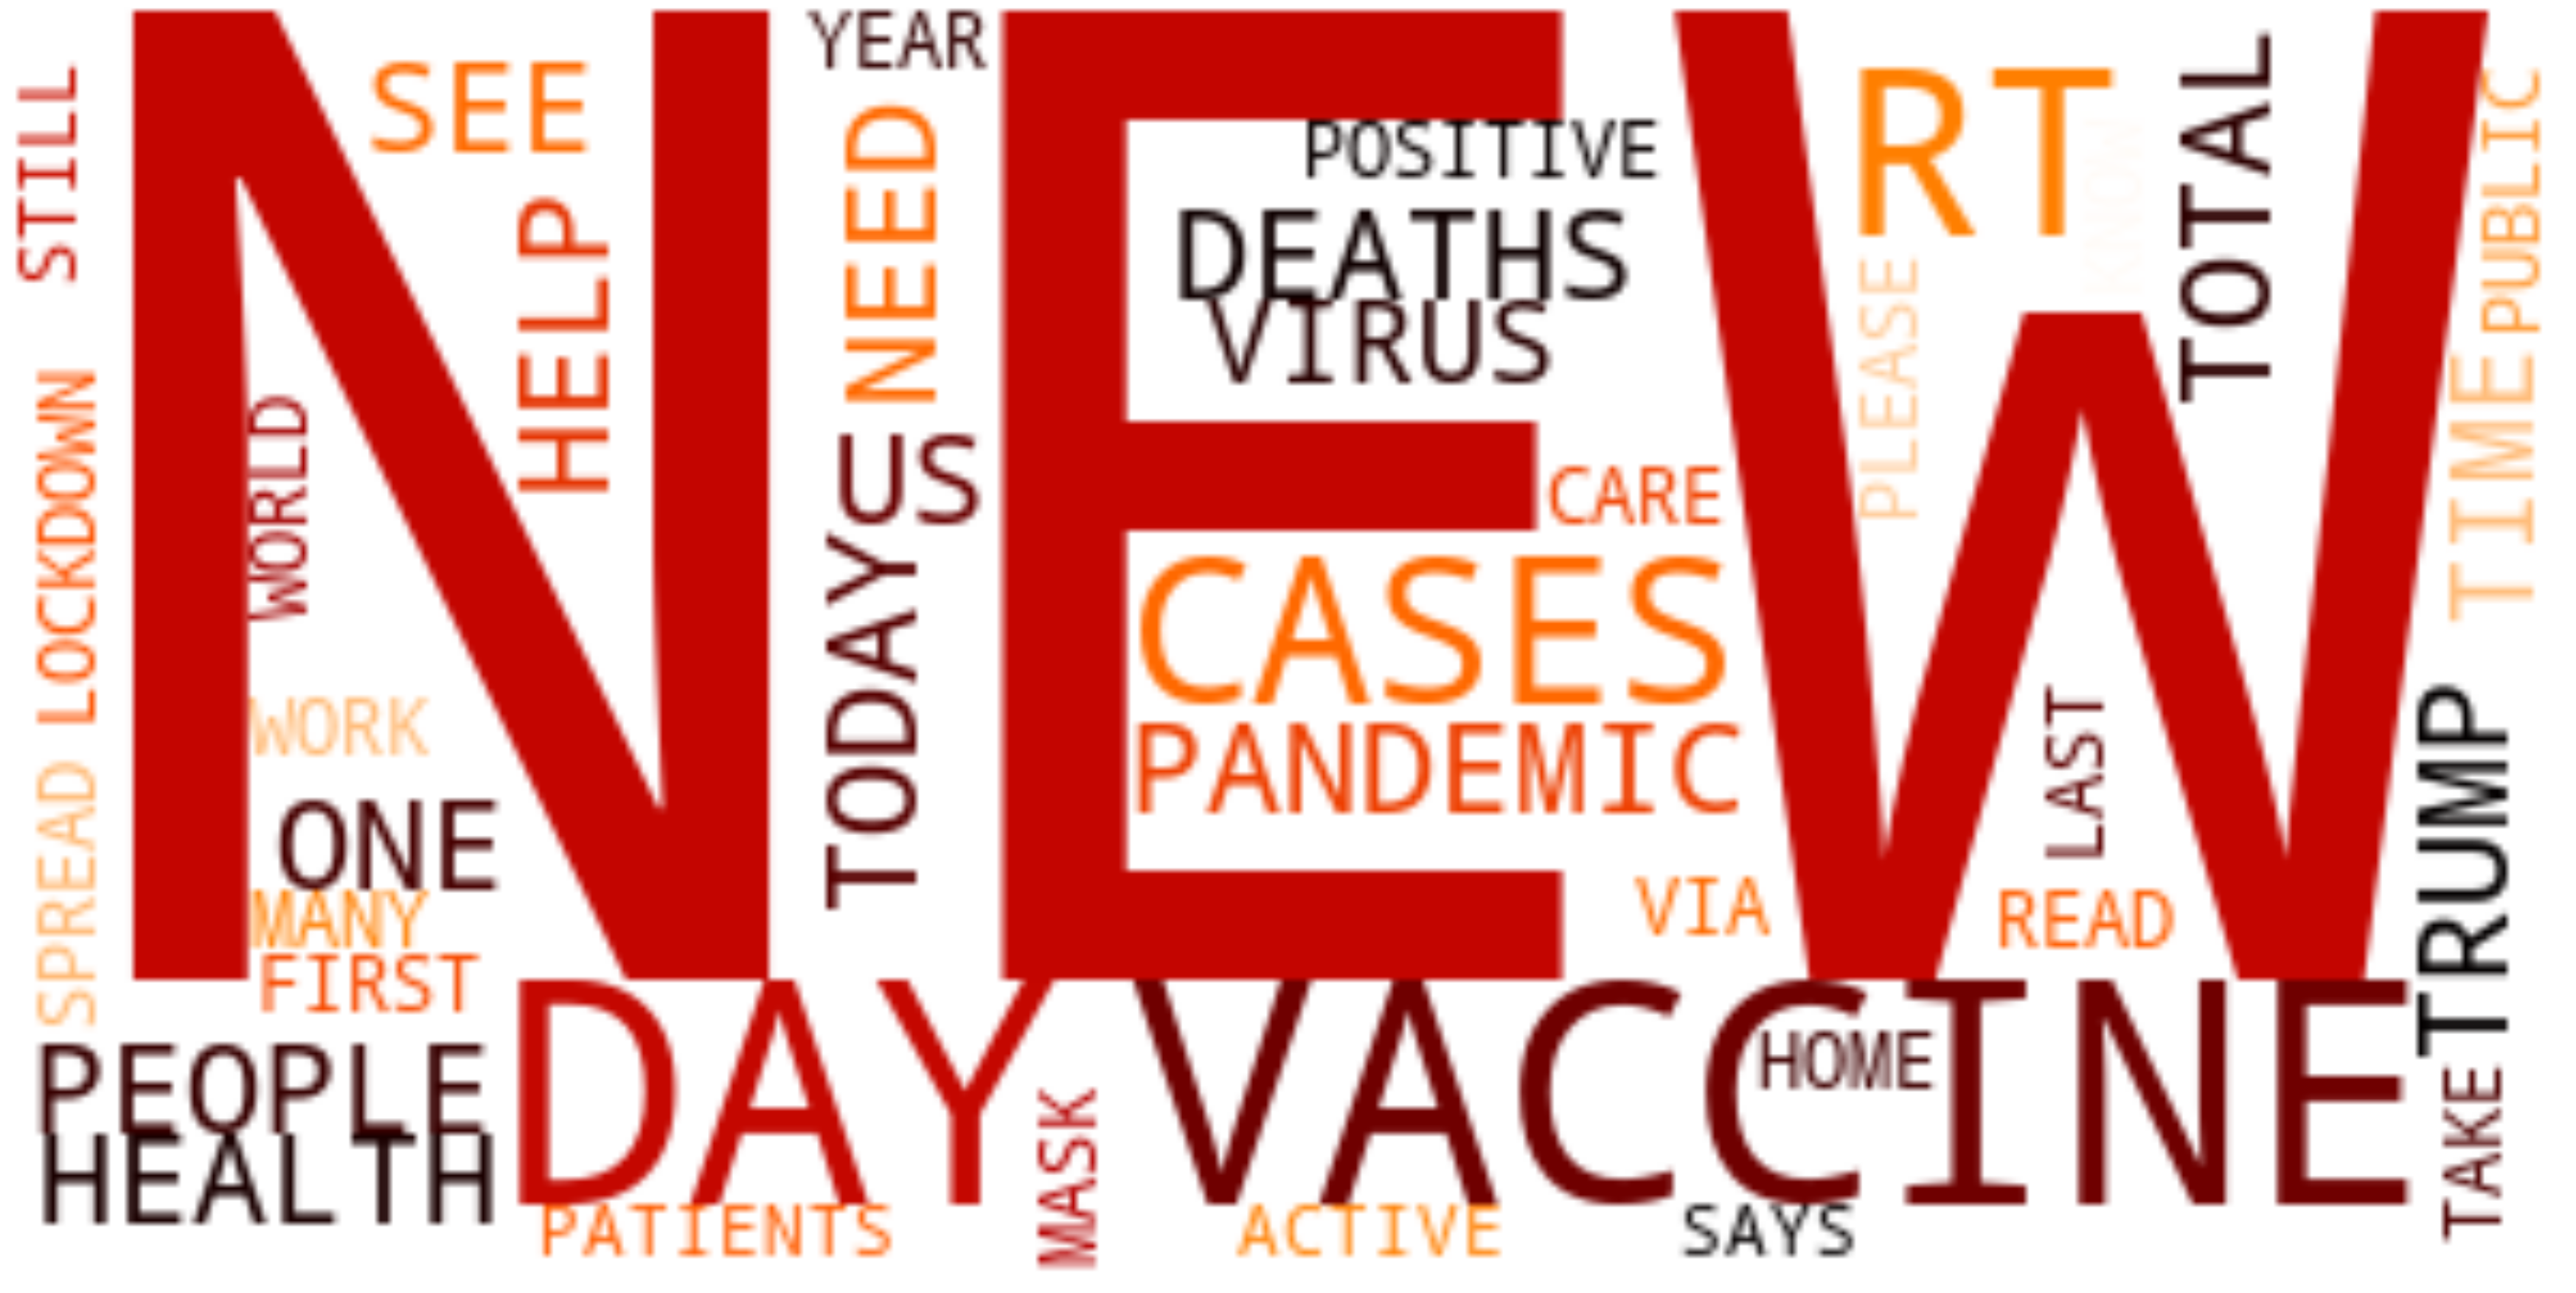

In [121]:
word_cloud = WordCloud(background_color='white', max_font_size=300,
                      max_words=50000, colormap='gist_heat')
word_cloud.generate(all_words.upper())
fig = plt.figure(figsize=[64, 32])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()
fig.savefig('img2/wordcloud.png')

### put the Cleaned text in main dataframe

In [122]:
dftext = texts_lr_lc_np_ns
df.head()

,user_name,date,text
0,3457,2020-08-12,Dear @nsitharaman @FinMinIndia @ianuragthakur ...
1,3020,2020-08-12,".@SingaporeAir , @airvistara sign commercial c..."
2,11033,2020-08-12,I have never seen commitment like it from the ...
3,6053,2020-08-12,A new study in @JPediatr found that #COVID19 c...
4,1061,2020-08-12,"Good article by The Economist, explaining that..."


# Sentiment Analysis 

Getting the polarity scores for each tweet

But first we need to convert the column text from float to string

In [124]:
df['text'] = df['text'].astype(str)

In [125]:
sid = SentimentIntensityAnalyzer()
ps = lambda x : sid.polarity_scores(x)
sentiment_scores = df.text.apply(ps)
sentiment_scores

0        {'neg': 0.094, 'neu': 0.802, 'pos': 0.104, 'co...
1        {'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'comp...
2        {'neg': 0.048, 'neu': 0.839, 'pos': 0.113, 'co...
3        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4        {'neg': 0.039, 'neu': 0.882, 'pos': 0.08, 'com...
                               ...                        
51045    {'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'comp...
51046    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
51047    {'neg': 0.0, 'neu': 0.92, 'pos': 0.08, 'compou...
51048    {'neg': 0.202, 'neu': 0.798, 'pos': 0.0, 'comp...
51049    {'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'comp...
Name: text, Length: 51050, dtype: object

In [126]:
sentiment_df = pd.DataFrame (data = list(sentiment_scores))
sentiment_df.head()

,neg,neu,pos,compound
0,0.094,0.802,0.104,-0.1290
1,0.000,0.824,0.176,0.4939
2,0.048,0.839,0.113,0.6977
3,0.000,1.000,0.000,0.0000
4,0.039,0.882,0.080,0.3612


### Labeling the scores based on the compound polarity value

In [127]:
labelize = lambda x : 'neutral' if x==0 else ('positive' if x>0 else 'negative')
sentiment_df['label'] = sentiment_df.compound.apply(labelize)
sentiment_df.head()

,neg,neu,pos,compound,label
0,0.094,0.802,0.104,-0.1290,negative
1,0.000,0.824,0.176,0.4939,positive
2,0.048,0.839,0.113,0.6977,positive
3,0.000,1.000,0.000,0.0000,neutral
4,0.039,0.882,0.080,0.3612,positive


### let's join two dataframes

In [128]:
data = df.join (sentiment_df.label)
data.head()

,user_name,date,text,label
0,3457,2020-08-12,Dear @nsitharaman @FinMinIndia @ianuragthakur ...,negative
1,3020,2020-08-12,".@SingaporeAir , @airvistara sign commercial c...",positive
2,11033,2020-08-12,I have never seen commitment like it from the ...,positive
3,6053,2020-08-12,A new study in @JPediatr found that #COVID19 c...,neutral
4,1061,2020-08-12,"Good article by The Economist, explaining that...",positive


### Plotting the sentiment score counts

In [129]:
count_df = data.label.value_counts().reset_index()
count_df

,index,label
0,positive,24160
1,negative,15305
2,neutral,11585


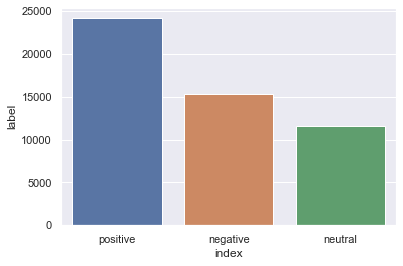

In [130]:
sns.barplot(x='index', y='label', data= count_df)
# Saving the Seaborn Figure:
plt.savefig('img2/sentiment.png')

In [131]:
data.head()

,user_name,date,text,label
0,3457,2020-08-12,Dear @nsitharaman @FinMinIndia @ianuragthakur ...,negative
1,3020,2020-08-12,".@SingaporeAir , @airvistara sign commercial c...",positive
2,11033,2020-08-12,I have never seen commitment like it from the ...,positive
3,6053,2020-08-12,A new study in @JPediatr found that #COVID19 c...,neutral
4,1061,2020-08-12,"Good article by The Economist, explaining that...",positive


In [132]:
data_agg = data [['user_name','date','label']].groupby (['date','label']).count().reset_index()
data_agg.columns = ['date','label','counts']
data_agg.head()

,date,label,counts
0,2020-01-12,negative,696
1,2020-01-12,neutral,510
2,2020-01-12,positive,1128
3,2020-02-12,negative,642
4,2020-02-12,neutral,530


In [133]:
fig = px.line(data_agg, x='date', y='counts', color='label', title = 'daily tweets sentimental analysis')
fig.write_image("img2/dailytweets.png",width=1000, height=500)
fig.show()